# Big Data (UBA) -  2024

## Trabajo Práctico 2

### Fecha de entrega:
<font color='red'> Viernes 8 de Noviembre a las 13:00 hs </font>

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada **TP2**. Este Jupyter Notebook y el correspondiente al **TP2** deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo m.n.romero91@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

In [85]:
# Instalacion de paquetes/librerias

import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import locale
import datetime
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde


In [17]:
df_airbnb_ny = pd.read_csv('/content/Base Airbnb NY.csv')

In [18]:
df_airbnb_ny.shape

(48895, 16)

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [106]:
# Resolver acá

# Eliminar columnas: last_review, host_name, neighbourhood, porque no agregan información
# relevante pare el analisis

df_airbnb_ny_filtered = df_airbnb_ny.drop(columns=['last_review', 'host_name','neighbourhood','name'])
df_airbnb_ny_filtered.shape

# Minimun nigth <35 noches. Los que alquilan maas de 35 dias, pareceria que no son turistas,
# sino que son ciudadanos que se encuentran transiscionando hacia un alquiler mas definitivo.

df_airbnb_ny_filtered = df_airbnb_ny_filtered[df_airbnb_ny_filtered['minimum_nights'] < 35]
df_airbnb_ny_filtered.shape

# columna price, elimino los valores nulos.

df_airbnb_ny_filtered= df_airbnb_ny_filtered.dropna(subset=['price'])
df_airbnb_ny_filtered.shape

# columna price, ademas se eliminan las observaciones con precios mayores a 500 dolares la noche.

df_airbnb_ny_filtered = df_airbnb_ny_filtered.loc[(df_airbnb_ny_filtered['price'] <= 500) & (df_airbnb_ny_filtered['price'] > 0)]
df_airbnb_ny_filtered.shape

# columna availability_365, elimino los valores negativos y 0 (si no esta nunca disponible,
# no se puede reservar)

df_airbnb_ny_filtered = df_airbnb_ny_filtered[df_airbnb_ny_filtered['availability_365'] > 0]

# columna reviews_per_month, los nulos les ponemos cero.

df_airbnb_ny_filtered['reviews_per_month'] = df_airbnb_ny_filtered['reviews_per_month'].fillna(0)

# Cambio los valores de ‘room_type’ a observaciones numericas.

df_airbnb_ny_filtered['room_type_num'] = df_airbnb_ny_filtered['room_type'].replace({
    'Private room': 1,
    'Entire home/apt': 2,
    'Shared room': 3
})

# Cambio los valores de ‘neighbourhood_group’ a observaciones numericas.

df_airbnb_ny_filtered['neighbourhood_group_num'] = df_airbnb_ny_filtered['neighbourhood_group'].replace({
    'Brooklyn': 1,
    'Manhattan': 2,
    'Queens': 3,
    'Staten Island': 4,
    'Bronx': 5
})

# Crear la columna "offer group" que contine la cantidad de oferentes por “Neighbourhood group”

offer_group = df_airbnb_ny_filtered.groupby('neighbourhood_group')['id'].count().reset_index()
offer_group.columns = ['neighbourhood_group', 'offer_group']
df_airbnb_ny_filtered = df_airbnb_ny_filtered.merge(offer_group, on='neighbourhood_group')
df_airbnb_ny_filtered.head()
#df_airbnb_ny_filtered.shape

<ipython-input-106-a715f06b383b>:36: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-106-a715f06b383b>:44: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,offer_group
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365,1,1,11926
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355,2,2,12717
2,3647,4632,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365,1,2,12717
3,3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194,2,1,11926
4,5099,7322,Manhattan,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129,2,2,12717


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación. También , tenga encuenta

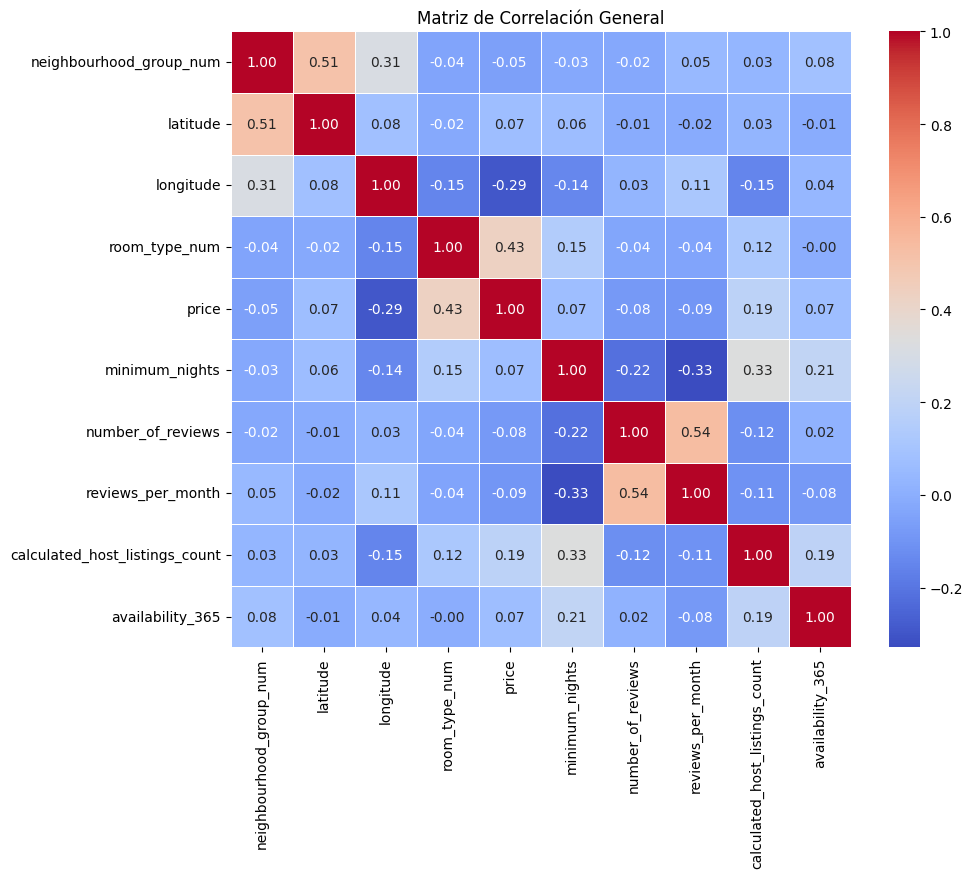

In [107]:
# Resolver acá

# Seleccionar las columnas numéricas
df_airbnb_ny_filtered_num = df_airbnb_ny_filtered[['neighbourhood_group_num','latitude','longitude',
                                                  'room_type_num','price','minimum_nights',
                                                  'number_of_reviews','reviews_per_month',
                                                  'calculated_host_listings_count','availability_365'
                                                  ]]

# Mapa de Calor de los Atributos Numéricos

plt.figure(figsize=(10, 8))
sns.heatmap(df_airbnb_ny_filtered_num.corr(),
            xticklabels=df_airbnb_ny_filtered_num.columns,
            yticklabels=df_airbnb_ny_filtered_num.columns,
            cmap="coolwarm",
            annot=True,
            linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación General")
plt.savefig('correlacion_num.png', bbox_inches='tight', dpi=300)
plt.show()

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [108]:
# Resolver acá

# Gráfico para la proporción de oferentes por 'Neighbourhood group'

oferentes_neighbourhood = df_airbnb_ny_filtered['neighbourhood_group'].value_counts(normalize=True).reset_index()
oferentes_neighbourhood.columns = ['Neighbourhood Group', 'Proporción']



fig1 = px.pie(oferentes_neighbourhood,
               values='Proporción',
               names='Neighbourhood Group',
               title='Proporción de Oferentes por Neighbourhood Group',
               hole=0.3)  # Añadir un agujero en el centro para hacer un gráfico de dona
fig1.show()

# Calcular la proporción de oferentes por 'tipo de habitación'
oferentes_room_type = df_airbnb_ny_filtered['room_type'].value_counts(normalize=True).reset_index()
oferentes_room_type.columns = ['Tipo de Habitación', 'Proporción']

# Gráfico de torta para proporción de oferentes por 'tipo de habitación'
fig2 = px.pie(oferentes_room_type,
               values='Proporción',
               names='Tipo de Habitación',
               title='Proporción de Oferentes por Tipo de Habitación',
               hole=0.3)  # Gráfico de dona
fig2.show()

#### Ejercicio 4
Realicen un histograma y función de kernel de los precios de los alojamientos. Comenten el gráfico obtenido, las decisiones de ancho de banda y función de kernel seleccionada. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación?

In [109]:
# Resolver acá

# se trata de mostrar los precios menores
fig_hist = px.histogram(df_airbnb_ny_filtered,
                   x='price',
                   nbins=30,  # Puedes ajustar el número de bins
                   title='Histograma de Precios de Alojamientos con Densidad de Kernel',
                   barmode='overlay',
                   opacity=0.75,
                   color_discrete_sequence=['#FF5A5F'])


# Calcular la densidad de kernel
data = df_airbnb_ny_filtered['price']
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 100)
kde_values = kde(x_range)

# Añadir la curva de densidad al gráfico
fig_hist.add_scatter(x=x_range, y=kde_values * (len(data) * (max(data) - min(data)) / 30),
                                               mode='lines',
                                               name='Densidad de Kernel',
                                               line=dict(color='white', width=2))  # Cambiar el color y el grosor si es necesario

# Mostrar el gráfico
fig_hist.show()

# Calcular el precio máximo, mínimo y promedio
precio_maximo = df_airbnb_ny_filtered['price'].max()
precio_minimo = df_airbnb_ny_filtered['price'].min()
precio_promedio = df_airbnb_ny_filtered['price'].mean()

print(f"Precio máximo: ${precio_maximo:.1f}")
print(f"Precio mínimo: ${precio_minimo:.1f}")
print(f"Precio promedio: ${precio_promedio:.1f}")

# Calcular la media de precios por neighbourhood group utilizando group by
media_precio_neighbourhood = df_airbnb_ny_filtered.groupby('neighbourhood_group')['price'].mean().reset_index()

# Calcular la media de precios por tipo de habitación utilizando group by
media_precio_room_type = df_airbnb_ny_filtered.groupby('room_type')['price'].mean().reset_index()

# Formatear los resultados a dólares con un solo decimal
media_precio_neighbourhood['price'] = media_precio_neighbourhood['price'].apply(lambda x: f"${x:.1f}")
media_precio_room_type['price'] = media_precio_room_type['price'].apply(lambda x: f"${x:.1f}")

# Imprimir los resultados
print("Media de precio por 'Neighbourhood group':")
print(media_precio_neighbourhood)

print("\nMedia de precio por 'Room type':")
print(media_precio_room_type)

Precio máximo: $500.0
Precio mínimo: $10.0
Precio promedio: $136.9
Media de precio por 'Neighbourhood group':
  neighbourhood_group   price
0               Bronx   $83.0
1            Brooklyn  $118.8
2           Manhattan  $172.8
3              Queens   $94.7
4       Staten Island   $89.3

Media de precio por 'Room type':
         room_type   price
0  Entire home/apt  $187.4
1     Private room   $84.3
2      Shared room   $61.2


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [110]:
# Resolver acá

# Gráfico de dispersión: N° de alojamientos por host vs. Noches minimas por reserva
fig3 = px.scatter(df_airbnb_ny_filtered,
                  x='calculated_host_listings_count',
                  y='minimum_nights',
                  color='room_type',  # Puedes usar esta variable para colorear los puntos
                  title='Scatter Plot: N° de alojamientos por host vs. Noches minimas por reserva',
                  labels={'calculated_host_listings_count': 'N° de alojamientos por host', 'minimum_nights': 'Noches minimas por reserva'},
                  hover_data=['neighbourhood_group'])  # Muestra el grupo de vecindario al pasar el mouse

fig3.show()

# Gráfico de dispersión: Latitud vs. Longitud
fig4 = px.scatter(df_airbnb_ny_filtered,
                  x='latitude',
                  y='longitude',
                  color='room_type',
                  title='Scatter Plot: Latitud vs. Longitud',
                  labels={'calculated_host_listings_count': 'N° de alojamientos por host', 'minimum_nights': 'Noches minimas por reserva'},
                  hover_data=['neighbourhood_group'])

fig4.show()


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las *ponderaciones* (o *loadings*) de las variables en dos dimensiones (biplot con flechas). Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

Varianza explicada por el primer componente: 0.21
Varianza explicada por el segundo componente: 0.17
Varianza total explicada: 0.38


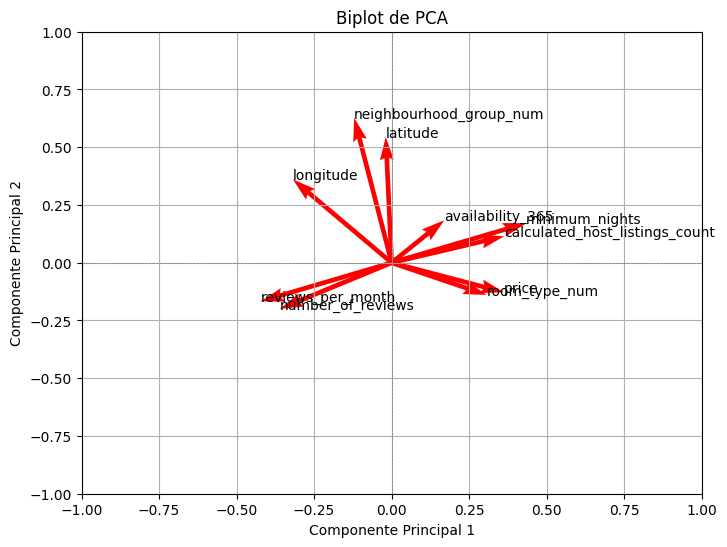

In [114]:
# Resolver acá

scaler = StandardScaler()
df_airbnb_ny_filtered_num_scaled = scaler.fit_transform(df_airbnb_ny_filtered_num)

# Realizar PCA
pca = PCA(n_components=2)
pca.fit(df_airbnb_ny_filtered_num_scaled)

# Obtener las componentes y las varianzas explicadas
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Imprimir el porcentaje de varianza explicada
print(f"Varianza explicada por el primer componente: {explained_variance[0]:.2f}")
print(f"Varianza explicada por el segundo componente: {explained_variance[1]:.2f}")
print(f"Varianza total explicada: {sum(explained_variance):.2f}")

# Crear el biplot
plt.figure(figsize=(8, 6))
plt.quiver(
    np.zeros(len(df_airbnb_ny_filtered_num.columns)),  # Origen en 0,0
    np.zeros(len(df_airbnb_ny_filtered_num.columns)),  # Origen en 0,0
    components[0],              # Carga en el primer componente
    components[1],              # Carga en el segundo componente
    angles='xy',
    scale_units='xy',
    scale=1,
    color='r'
)

# Añadir las etiquetas de las variables
for i, var in enumerate(df_airbnb_ny_filtered_num.columns):
    plt.text(components[0][i], components[1][i], var, color='black')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.title('Biplot de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

### Parte III: Predicción y Validación

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal, generen un una tabla para presentar las estimaciones de los coeficientes y comenten los resultados obtenidos.

In [ ]:
# Resolver acá


#### Ejercicio 10: Predicción afuera de la muestra
Calcule el Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE), y el Error Absoluto Medio (MAE) en la base de entrenamiento y testeo (usando coeficientes estimados con la base de entrenamiento). Presente los resultados en una tabla y comente las diferencias de calcular estas medidas de bondad de ajuste adentro y afuera de la muestra